In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = 'predictive_maintenance.csv'
data = pd.read_csv(data_path)
n = data.shape[0]
# First checks
print('Features non-null values and data type:')
data.info()
print('Check for duplicate values:', data['Product ID'].unique().shape[0]!=n)

Features non-null values and data type:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB
Check for duplicate values: False


In [3]:
data['Tool wear [min]'] = data['Tool wear [min]'].astype('float64')
data['Rotational speed [rpm]'] = data['Rotational speed [rpm]'].astype('float64')
# Rename features
data.rename(mapper={'Air temperature [K]': 'Air temperature',
                    'Process temperature [K]': 'Process temperature',
                    'Rotational speed [rpm]': 'Rotational speed',
                    'Torque [Nm]': 'Torque',
                    'Tool wear [min]': 'Tool wear'}, axis=1, inplace=True)

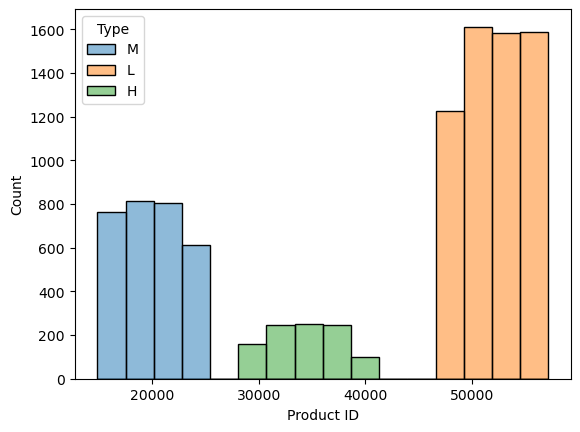

In [4]:
# Remove first character and set to numeric dtype
data['Product ID'] = data['Product ID'].apply(lambda x: x[1:])
data['Product ID'] = pd.to_numeric(data['Product ID'])

# Histogram of ProductID
sns.histplot(data=data, x='Product ID', hue='Type')
plt.show()

In [5]:
# Drop ID columns
df = data.copy()
df.drop(columns=['UDI','Product ID'], inplace=True)

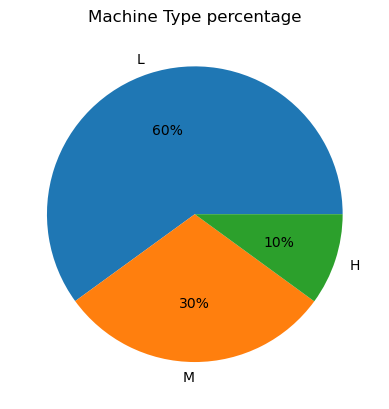

In [6]:
value = data['Type'].value_counts()
Type_percentage = 100 * value / data['Type'].shape[0]

labels = Type_percentage.index.array
x = Type_percentage.array

plt.pie(x, labels = labels, colors=sns.color_palette('tab10')[0:3], autopct='%.0f%%')
plt.title('Machine Type percentage')
plt.show()

In [7]:
# Create lists of features and target names
features = [col for col in df.columns if df[col].dtype == 'float64' or col == 'Type']
target = ['Target', 'Failure Type']

# Filtering the DataFrame Based on 'Random Failures'
idx_RNF = df.loc[df['Failure Type'] == 'Random Failures'].index
df.loc[idx_RNF, target]

,Target,Failure Type
1221,0,Random Failures
1302,0,Random Failures
1748,0,Random Failures
2072,0,Random Failures
2559,0,Random Failures
3065,0,Random Failures
3452,0,Random Failures
5471,0,Random Failures
5489,0,Random Failures
5495,0,Random Failures


In [8]:
first_drop = df.loc[idx_RNF,target].shape[0]
print('Number of observations where RNF=1 but Machine failure=0:',first_drop)

# Drop corresponding observations and RNF column
df.drop(index=idx_RNF, inplace=True)

Number of observations where RNF=1 but Machine failure=0: 18


In [9]:
# Portion of data where Machine failure=1 but no failure cause is specified
idx_ambiguous = df.loc[(df['Target']==1) & (df['Failure Type']=='No Failure')].index

second_drop = df.loc[idx_ambiguous].shape[0]
print('Number of ambiguous observations:', second_drop)

display(df.loc[idx_ambiguous,target])
df.drop(index=idx_ambiguous, inplace=True)

Number of ambiguous observations: 9


,Target,Failure Type
1437,1,No Failure
2749,1,No Failure
4044,1,No Failure
4684,1,No Failure
5536,1,No Failure
5941,1,No Failure
6478,1,No Failure
8506,1,No Failure
9015,1,No Failure


In [10]:
print('Global percentage of removed observations:', (100*(first_drop+second_drop)/n))

df.reset_index(drop=True, inplace=True)   # Reset index
n = df.shape[0]

Global percentage of removed observations: 0.27


In [11]:
df.describe()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target
count,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000
mean,300.003259,310.004031,1538.893212,39.978993,107.921087,0.033089
std,2.000548,1.483692,179.412171,9.966805,63.649152,0.178879
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.700000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


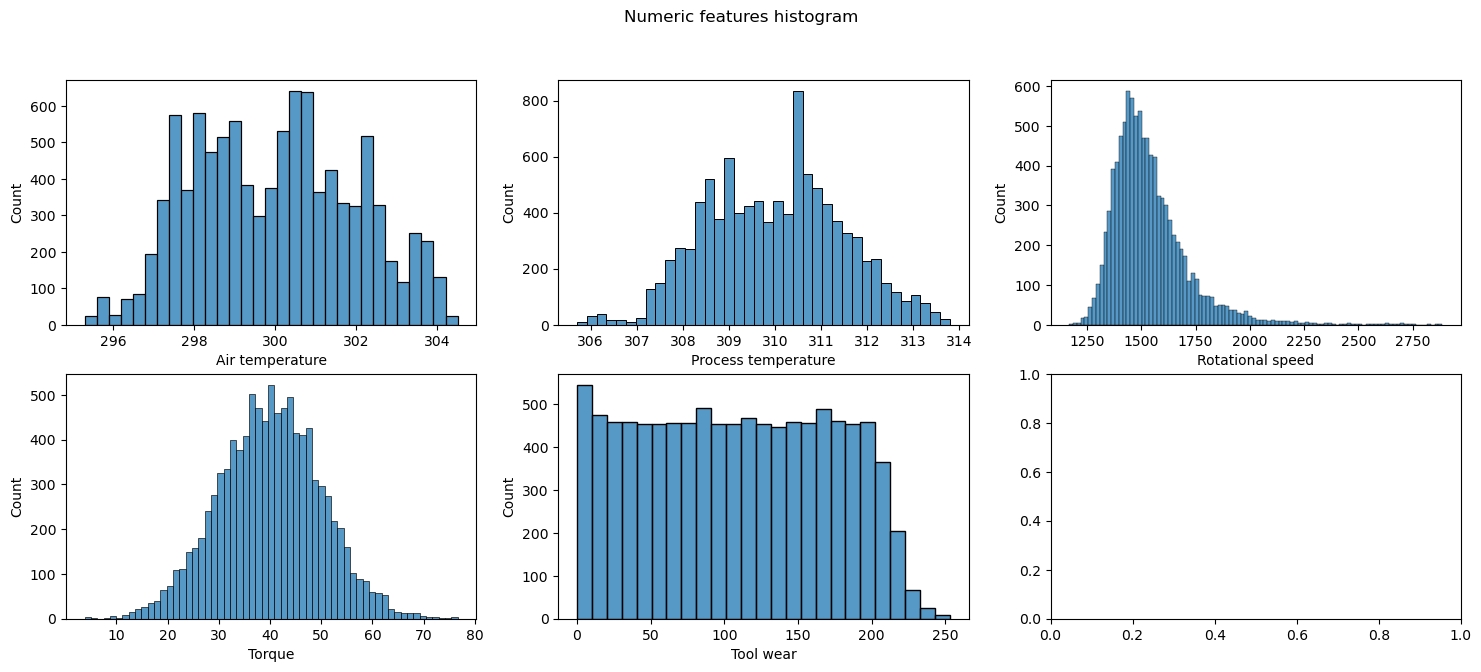

In [12]:
num_features = [feature for feature in features if df[feature].dtype == 'float64']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 7))
fig.suptitle('Numeric features histogram')
for j, feature in enumerate(num_features):
    sns.histplot(ax=axs[j//3, j-3*(j//3)], data=df, x=feature)
plt.show()

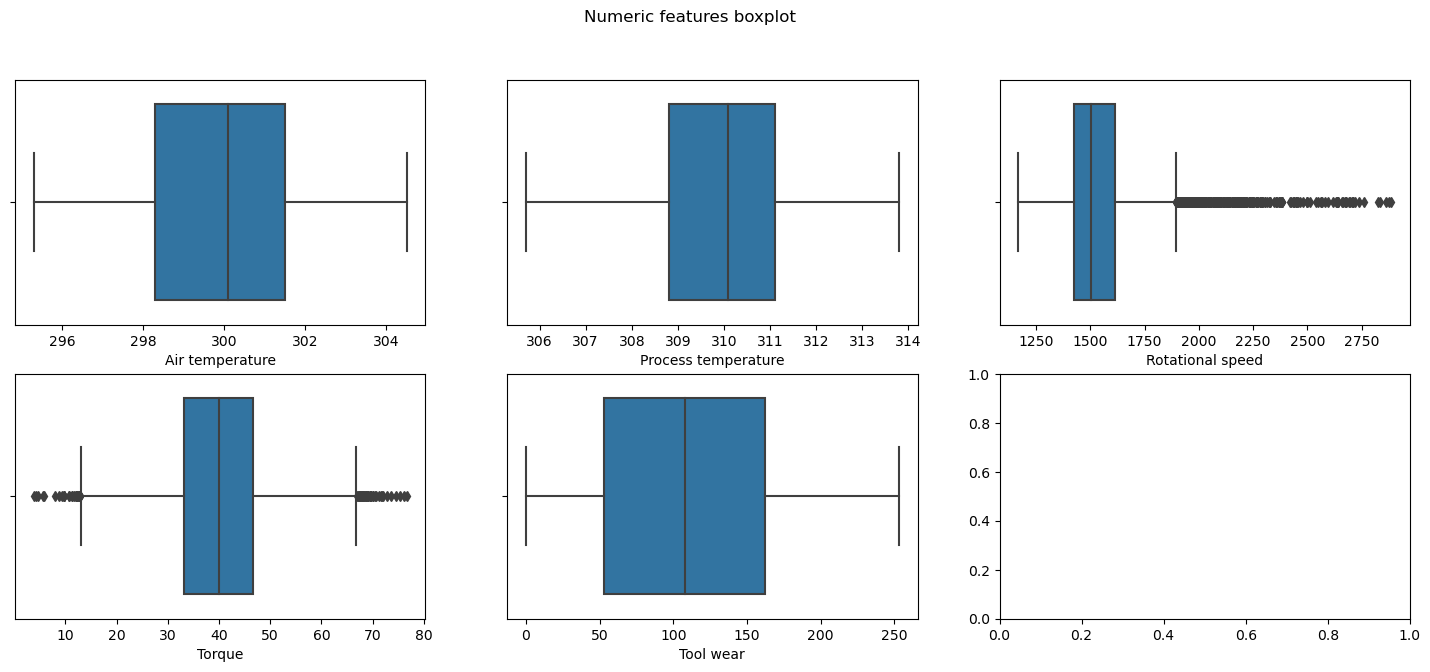

In [13]:
# boxplot of numeric features
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18,7))
fig.suptitle('Numeric features boxplot')
for j, feature in enumerate(num_features):
    sns.boxplot(ax=axs[j//3, j-3*(j//3)], data=df, x=feature)
plt.show()

Failures percentage in data: 3.31


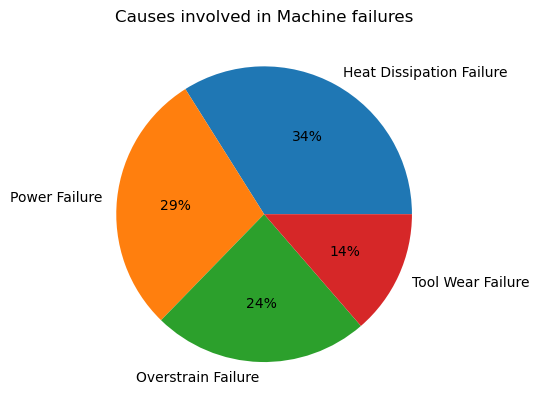

In [14]:
# Portion of df where there is a failure and causes percentage
idx_fail = df.loc[df['Failure Type'] != 'No Failure'].index
df_fail = df.loc[idx_fail]
df_fail_percentage = 100*df_fail['Failure Type'].value_counts()/df_fail['Failure Type'].shape[0]
print('Failures percentage in data:',
      round(100*df['Target'].sum()/n,2))
# Pie plot
plt.title('Causes involved in Machine failures')
plt.pie(x=df_fail_percentage.array, labels=df_fail_percentage.index.array,
        colors=sns.color_palette('tab10')[0:4], autopct='%.0f%%')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

X = data[['Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear']]
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42)
}


In [17]:
for name, model in models.items():
    model.fit(X_train, y_train)

In [18]:
from sklearn.metrics import classification_report

for name, model in models.items():
    print(f"Model: {name}")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

Model: Random Forest
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.82      0.59      0.69        61

    accuracy                           0.98      2000
   macro avg       0.90      0.79      0.84      2000
weighted avg       0.98      0.98      0.98      2000

Model: Support Vector Machine
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1939
           1       1.00      0.03      0.06        61

    accuracy                           0.97      2000
   macro avg       0.99      0.52      0.52      2000
weighted avg       0.97      0.97      0.96      2000

Model: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1939
           1       0.57      0.13      0.21        61

    accuracy                           0.97      2000
   macro avg       0.77      0.56      0.60      2

In [21]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.2/99.8 MB 2.1 MB/s eta 0:00:48
   ---------------------------------------- 0.3/99.8 MB 2.5 MB/s eta 0:00:40
   ---------------------------------------- 0.4/99.8 MB 2.1 MB/s eta 0:00:49
   ---------------------------------------- 0.5/99.8 MB 2.6 MB/s eta 0:00:38
   ---------------------------------------- 0.6/99.8 MB 2.1 MB/s eta 0:00:47
   ---------------------------------------- 0.8/99.8 MB 2.6 MB/s eta 0:00:39
   ---------------------------------------- 0.8/99.8 MB 2.6 MB/s eta 0:00:39
   -----------------------------------

In [22]:
from xgboost import XGBClassifier

# Create XGBoost classifier
xgb_classifier = XGBClassifier()

# Fit the classifier to the training data
xgb_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.85      0.64      0.73        61

    accuracy                           0.99      2000
   macro avg       0.92      0.82      0.86      2000
weighted avg       0.98      0.99      0.98      2000



In [32]:
# Assuming new_data is a DataFrame with the same structure as X
new_data = pd.DataFrame({
    'Air temperature': [300, 1000],  # Example values
    'Process temperature': [305, 1000],
    'Rotational speed': [1500, 2000],
    'Torque': [40, 90],
    'Tool wear': [10, 1]
})

# Use the trained model to make predictions on the new data
new_predictions = xgb_classifier.predict(new_data)

# Display the predictions
print(new_predictions)


[0 1]


In [23]:
import pickle

In [24]:
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_classifier, file)